<a href="https://colab.research.google.com/github/HURU-School/Data-Science/blob/main/Scientific_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# start by importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Pandas will be used to handle the dataframe; numpy will be used to calculate a few key statistics such as median and standard deviation as well as to draw random samples from the dataset, matplotlib.pyplot and seaborn will be used together to generate the plot, and scipy will be used for the mathematical calculation of the normal statistics.

Next, let's define a function that will generate plottable points

In [ ]:


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

This function takes a list of sample readings (temperatures in this example) and sorts them from lowest to highest. It returns a set of (x,y) pairs that represent the temperature reading and the relative position in the sorted list, or percentile, of each reading.

Next, we'll run that function on our sample data to get plottable datapoints.

In [ ]:
df=pd.read_csv('/content/sample_data/Grade Data  - Sheet1.csv')
x, y = ecdf(df["TestGrades"])

We can then use matplotlib and seaborn to plot our sample data with the following code:

Text(0, 0.5, 'Cumulative Distribution Function')

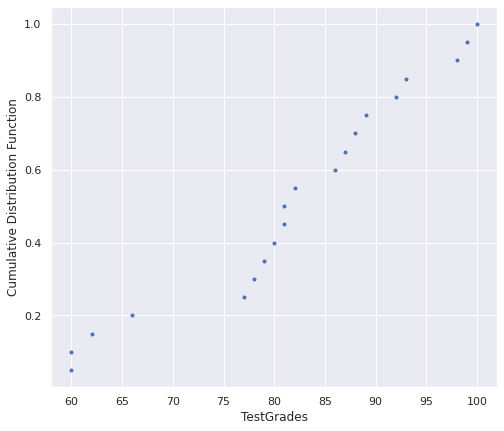

In [ ]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("TestGrades")
plt.ylabel("Cumulative Distribution Function")

#Running this will yield a chart that looks like the following:

Excellent! We can really start to see the curve here. Now, in order to compare this to a perfect normal distribution, we'll need to plot a second series of data. This could be done in a number of ways, but in this tutorial, we'll use a technique called bootstrapping to accomplish the task.

The following code will generate 100 'TestGrades' that follow a normal distribution using the mean and the standard deviation of our dataset to scale the range.

In [ ]:
samples = np.random.normal(np.mean(df["TestGrades"]), np.std(df["TestGrades"]), size=100)

This data will just be a list of TestGrades. We can transform this randomized data into x,y pairs using the same function we defined earlier, allowing us to plot the data alongside the actual samples with the following code:

In [ ]:
x_theor, y_theor = ecdf(samples)

These theoretical examples represent how the data would look if we had 100 samples and the distribution of the readings were perfectly normal. It's a hypothetical we can use to compare reality.

Let's plot this on the same chart as our earlier data with the following code and add a legend:

<function matplotlib.pyplot.show>

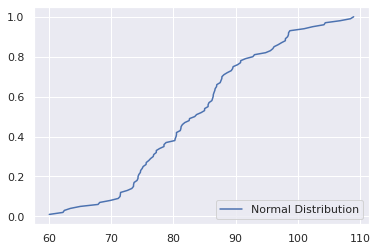

In [ ]:
plt.plot(x_theor, y_theor)
plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')

plt.show

 

Check that out! It looks like our sample data is very close to the true normal distribution! We can probably consider this data normally distributed. 

Let's add one more line of code to provide further insight into the distribution:

In [ ]:
print(stats.normaltest(df["TestGrades"]))

NormaltestResult(statistic=1.0592969258955085, pvalue=0.588811922507996)


This will run SciPy's normal test and print the results including a p representing A 2-sided chi squared probability for the hypothesis test. If the p value is less than our alpha (significance value), we can reject the hypothesis that this sample data is normally distributed. If greater, we cannot reject the null hypothesis and must conclude the data is normally distributed. 

 Based on this examination samples, can we conclude that TestGrades are normally distributed and there is no difference in the Marks awarded by the 2 professors